# Loan Approval Prediction Problem

# Introduction

- Loans are the core business of banks. The main profit comes directly from the loan’s interest. 
- The loan companies grant a loan after an intensive process of verification and validation. However, they still don’t have assurance if the applicant is able to repay the loan with no difficulties.
- In this project, we’ll build a predictive model to predict if an applicant is able to repay the lending company or not. We will prepare the data and use various models to predict the target variable.

# Dataset Description

- We have downloaded the dataset from https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset/notebooks?sortBy=hotness&group=everyone&pageSize=20&datasetId=137197&outputType=all
- For this problem, we have three CSV files: train, test.
- Train file will be used for training the model, i.e. our model will learn from this file. It contains all the independent variables and the target variable.
- Test file contains all the independent variables, but not the target variable. We will apply the model to predict the target variable for the test data.

# Import Some Libraries

In [1]:
#Basic libraries
import pandas as pd 
import numpy as np
from scipy import stats

# Import Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly

# Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score

# Data processing Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


# Other Libraries
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

# About Company

- Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

# Problem Statement

- Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. 
- These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. 
- To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

### So we have to predict wheather loan is approved or not using given data

# Read Train & Test data

In [2]:
train_data = pd.read_csv("train_data.csv")
print("Shape of train data is :", train_data.shape)
train_data.head()

Shape of train data is : (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
test_data = pd.read_csv("test_data.csv")
print("Shape of test data is :", test_data.shape)
test_data.head()

Shape of test data is : (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


**Observations :**
- There is total of 614 rows in train data and 367 rows in test data. Train data contain Loan_Status which is our target 

# Hypothesis Generation

#### Let generate some hypothesis by some domain knowlegde and just looking on data

1. **Dependents** : If a person is depends on more number of members or their relatives, the chances of loan approval is less. Let's take an example if we take two people who apply for loan, if on one people their is total of 3 dependents( their famil members) and for another if their is no one dependents (means all members earn money) then chances that this member can pay loan is more so cances for loan approval is high.

2. **Education :** If a person is educated than he can pay EMI on time or chances of loan to be pay is more ie, chances for loan approval is more.

3. **Self_Employed :** If a person is self empployed than their maybe some chances that his/her buisness fails or they were not able to pay their loan as compare to one who is not self employed and work for some other company or organization.

4. **ApplicantIncome :** If a person earn more we can conclude that he will able to repay loan so chances of loan approval is more.

5. **LoanAmount :** If amount of loan to be payed is less then their is high chances that loan be payed so chances for loan approval is also high.

6. **Loan_Amount_Term :** If loan taken for less time and have less amount then chances of loan approval is more.

7. **Credit_History :** If people repayed all of their previous debts (loans) then chances that he will get loan is more ie, cahnces that loan is approved is more.

8. **EMI :** If a person takes loan and if his monthly EMI to be payed is less then chances for loan to be payed on time is more, so chances for loan approval is high.

9. **CoapplicantIncome :** A co-applicant refers to a person who applies along with the borrower for a loan. This is done so that the income of the co-applicant can be used to supplement the borrower’s income and increase his/her eligibility. So if  CoapplicantIncome is more than chances for loan approval is more.

### So these are 9 hypothesis that we generates from our domain knowledge now validate our hypothesis to check if they are right or wrong.

# Look on data

In [4]:
print("Train Data-set contain these columns :\n ", train_data.columns)

Train Data-set contain these columns :
  Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [5]:
print("Test Data-set contain these columns :\n", test_data.columns)

Test Data-set contain these columns :
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


### Check informaion about data like null values and data types of columns

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [9]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

**Observations :**

1. There is total of 3 types of data types of columns : Object, int64 and float4 in both train and test data-sets. Out of which ApplicantIncome is int64 and CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History is float64 and rest are object.

2. There are some features which contain Null values in both train and test data-sets like : Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History in train data-set & Gender, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History in test data-set                 

### Impute missing values using mode (most_frequent) for categorical features and median (because of outliers we choose median as median is robust to outliers) for numerical features.

- For train : 

      caegorical : Gender, Married, Dependents, Self_Employed, Credit_History, Loan_Amount_Term.
  
      numerical : LoanAmount


- For test:

      categorical : Gender, Dependents, Self_Employed,Loan_Amount_Term, Credit_History.
  
      numerical : LoanAmount

In [10]:
# For Train

train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace=True)
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)

# For Test

test_data['Gender'].fillna(test_data['Gender'].mode()[0], inplace=True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0], inplace=True)
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0], inplace=True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0], inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0], inplace=True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(), inplace=True)

In [11]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Univariate Analysis

In [13]:
train_data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


### Univariate Analysis on Loan_Status

In [14]:
# Look on target variable

print("Percentage of Yes is {0} and No is {1} for target".format(train_data.Loan_Status.value_counts(normalize = True)[0]*100,train_data.Loan_Status.value_counts(normalize = True)[1]*100))

Percentage of Yes is 68.72964169381108 and No is 31.27035830618892 for target


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

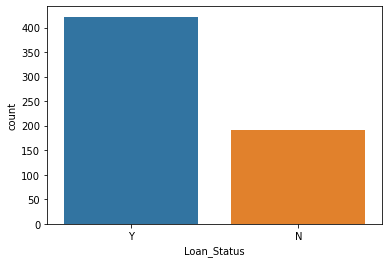

In [15]:
sns.countplot(x = 'Loan_Status', data = train_data)

* There are total of 68.72 % of target is Yes while 31.2 % are No

### Univariate Analysis on Numerical Feaures : ApplicantIncome, CoapplicantIncome, LoanAmount 

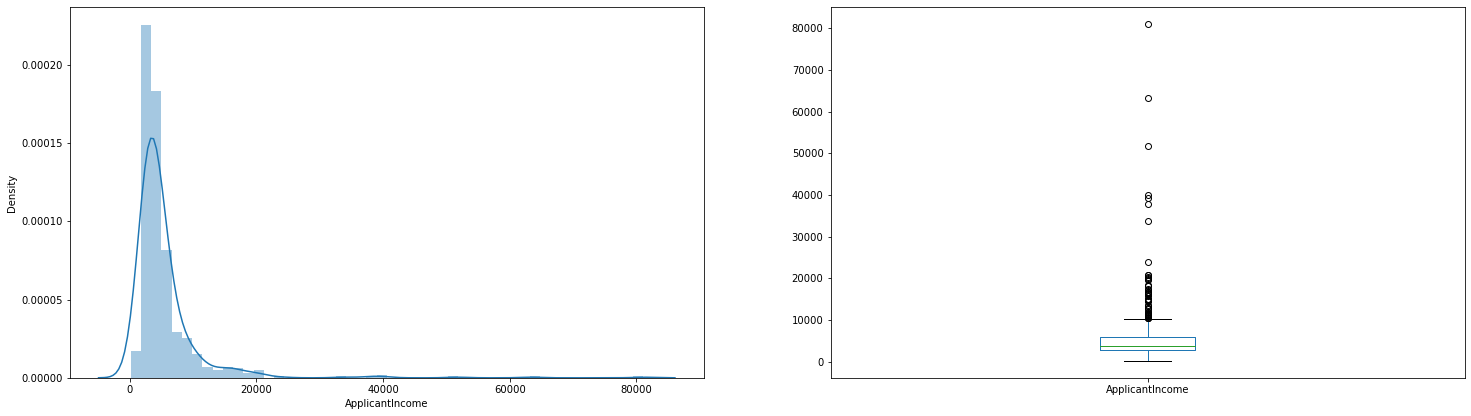

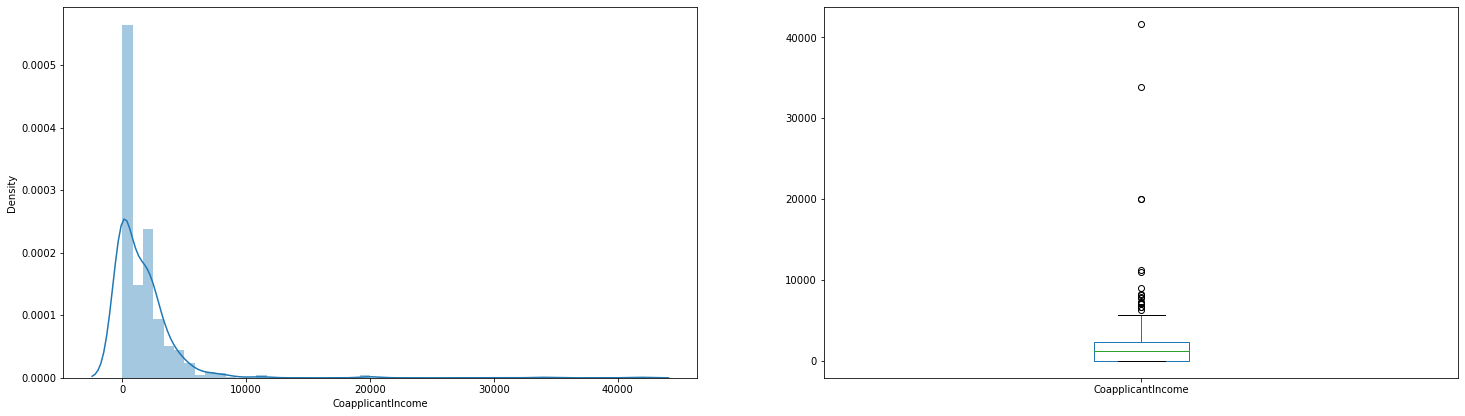

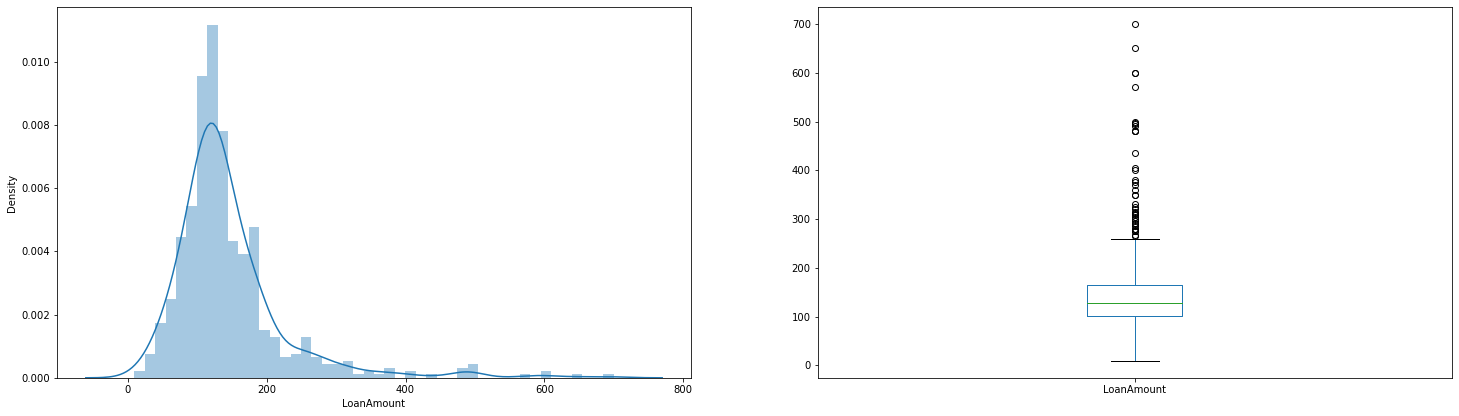

In [16]:
numeric_columns = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]

for x in numeric_columns:
    fig = plt.figure()
    fig.set_size_inches(25,15)
    
    plt.subplot(2,2,1)
    sns.distplot(train_data[x])
    
    plt.subplot(2,2,2)
    train_data[x].plot.box()
    
    plt.show()

**Observations :**

##### Distribution :

* ApplicantIncome, CoapplicantIncome are not normally distributed in them there are small number of people which have large income and large number of people have lower income which is like in log distributions.

* CoapplicantIncome is fairly normal

##### Outliers : 

* From above box plots we can see all ApplicantIncome, CoapplicantIncome, LoanAmount contains outliers so we have to remove them.

### Univariate Analysis on Categorical Feaures : Gender, Self_Employed, Married, Credit_History, Education

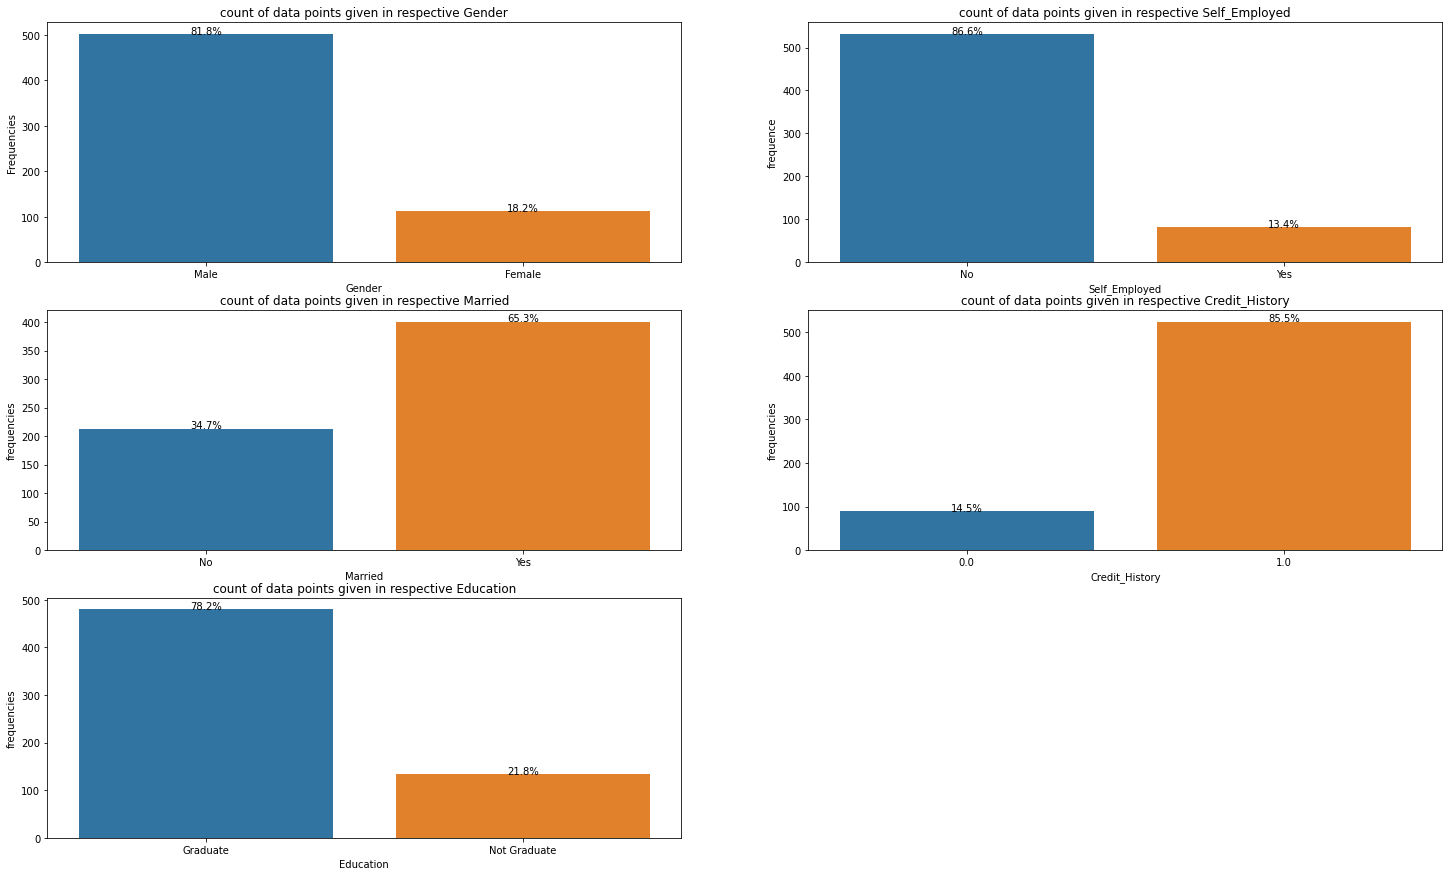

In [17]:
fig = plt.figure()
fig.set_size_inches(25,15)

plt.subplot(3,2,1)
ax = sns.countplot(x = 'Gender', data = train_data)
plt.title('count of data points given in respective Gender')
plt.xlabel('Gender')
plt.ylabel('Frequencies')
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()/train_data.shape[0]*100), (p.get_x() + 0.35, p.get_height()))

plt.subplot(3,2,2)
ax = sns.countplot(x = 'Self_Employed', data = train_data)
plt.title('count of data points given in respective Self_Employed')
plt.xlabel('Self_Employed')
plt.ylabel('frequence')
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()/train_data.shape[0]*100), (p.get_x() + 0.35, p.get_height()))

plt.subplot(3,2,3)
ax = sns.countplot(x = 'Married', data = train_data)
plt.title('count of data points given in respective Married')
plt.xlabel('Married')
plt.ylabel('frequencies')
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()/train_data.shape[0]*100), (p.get_x() + 0.35, p.get_height()))

plt.subplot(3,2,4)
ax = sns.countplot(x = 'Credit_History', data = train_data)
plt.title('count of data points given in respective Credit_History')
plt.xlabel('Credit_History')
plt.ylabel('frequencies')
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()/train_data.shape[0]*100), (p.get_x() + 0.35, p.get_height()))
        
plt.subplot(3,2,5)
ax = sns.countplot(x = 'Education', data = train_data)
plt.title('count of data points given in respective Education')
plt.xlabel('Education')
plt.ylabel('frequencies')
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()/train_data.shape[0]*100), (p.get_x() + 0.35, p.get_height()))

* 82 % of applicants are male

* Around 13 % applicants are self_employed

* Around 65 % applicants are married

* Arond 85 % applicants repay their loans sucessfully

* Arond 78 % applicants are graduated


### Univariate analysis on Ordinal feaures : Dependents, Property_Area

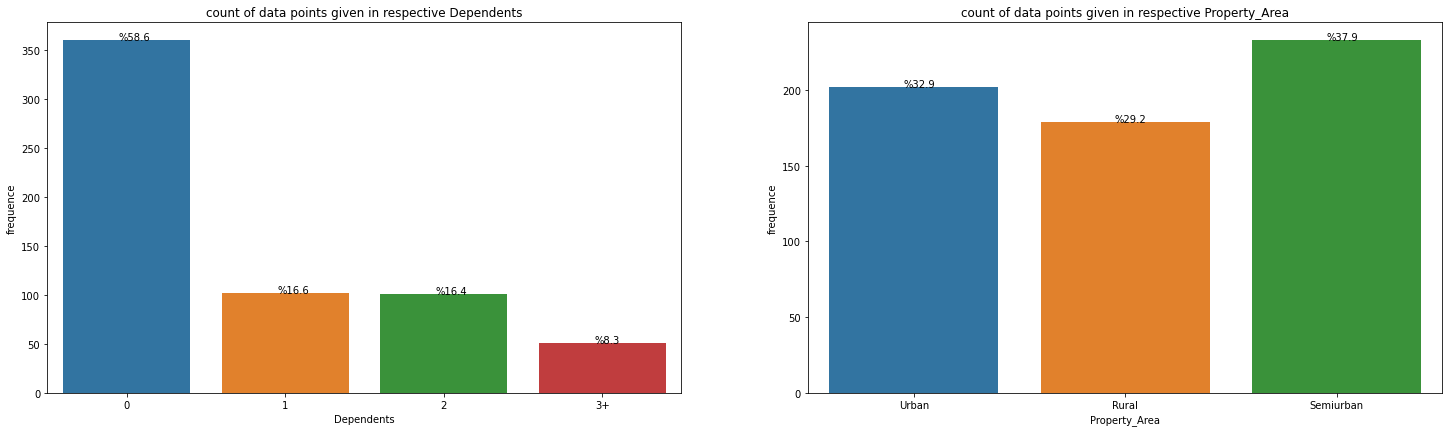

In [18]:
fig = plt.figure()
fig.set_size_inches(25,15)

plt.subplot(2,2,1)
ax = sns.countplot(x = 'Dependents', data = train_data)
plt.title('count of data points given in respective Dependents')
plt.xlabel('Dependents')
plt.ylabel('frequence')
for p in ax.patches:
        ax.annotate('%{:.1f}'.format(p.get_height()/train_data.shape[0]*100), (p.get_x() + 0.35, p.get_height()))

plt.subplot(2,2,2)
ax = sns.countplot(x = 'Property_Area', data = train_data)
plt.title('count of data points given in respective Property_Area')
plt.xlabel('Property_Area')
plt.ylabel('frequence')
for p in ax.patches:
        ax.annotate('%{:.1f}'.format(p.get_height()/train_data.shape[0]*100), (p.get_x() + 0.35, p.get_height()))

* Most of the applicants don’t have any dependents (58 %)

* Most of the applicants are from Semiurban area (40)

# Bivariate Analysis

#### Now look on bivariate analysis and try to validate our hypothesis


1. **Dependents :** If a person is depends on more number of members or their relatives, the chances of loan approval is less. Let's take an example if we take two people who apply for loan, if on one people their is total of 3 dependents( their famil members) and for another if their is no one dependents (means all members earn money) then chances that this member can pay loan is more so cances for loan approval is high.

2. **Education :** If a person is educated than he can pay EMI on time or chances of loan to be pay is more ie, chances for loan approval is more.

3. **Self_Employed :** If a person is self empployed than their maybe some chances that his/her buisness fails or they were not able to pay their loan as compare to one who is not self employed and work for some other company or organization.

4. **ApplicantIncome :** If a person earn more we can conclude that he will able to repay loan so chances of loan approval is more.

5. **LoanAmount :** If amount of loan to be payed is less then their is high chances that loan be payed so chances for loan approval is also high.

6. **Loan_Amount_Term :** If loan taken for less time and have less amount then chances of loan approval is more.

7. **Credit_History :** If people repayed all of their previous debts (loans) then chances that he will get loan is more ie, cahnces that loan is approved is more.

8. **EMI :** If a person takes loan and if his monthly EMI to be payed is less then chances for loan to be payed on time is more, so chances for loan approval is high.

9. **CoapplicantIncome :** A co-applicant refers to a person who applies along with the borrower for a loan. This is done so that the income of the co-applicant can be used to supplement the borrower’s income and increase his/her eligibility. So if  CoapplicantIncome is more than chances for loan approval is more.

### Bivariate analysis on Categorical Feaures : Gender, Self_Employed, Married, Credit_History, Education

In [19]:
train_data.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


FOR  Gender


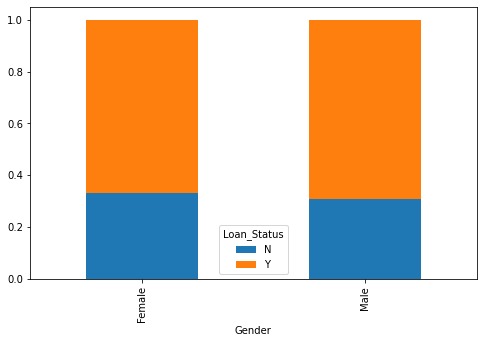

FOR  Self_Employed


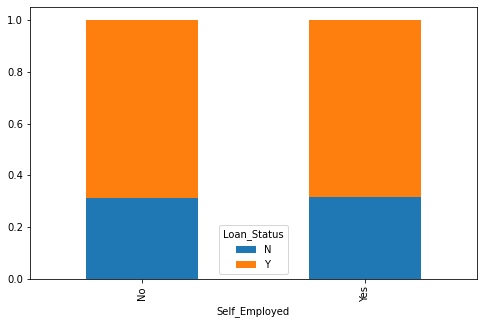

FOR  Married


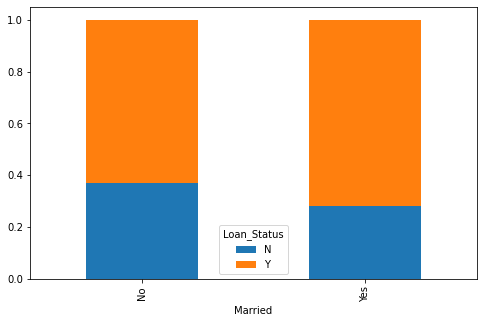

FOR  Credit_History


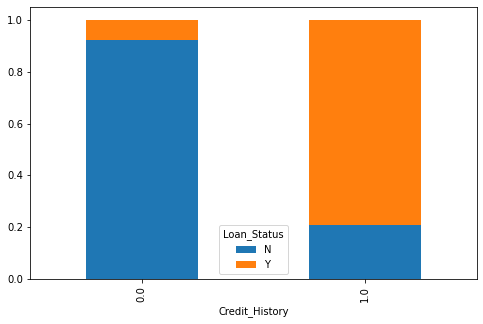

FOR  Education


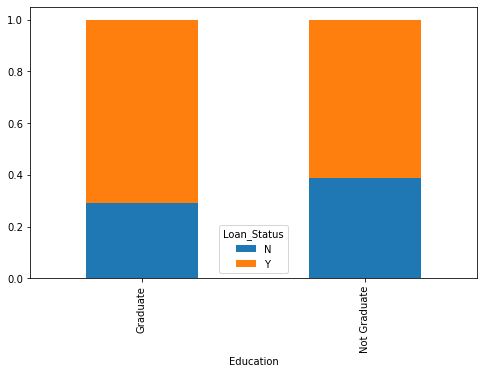

In [20]:
cat_columns = ["Gender", "Self_Employed", "Married", "Credit_History", "Education"]

for x in cat_columns:
    print("FOR ", x)
       
    plot = pd.crosstab(train_data[x], train_data['Loan_Status'])
    plot.div(plot.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (8,5))
    plt.show()

1. **For Gender :** Loan approved or not for both males and females are approximately same.


2. **For Self_Employed :** From above plot we can see for Self_Employed proportion of loan approved or not is same for both Self_Employed or not. So our hypothesis that if person is self eployed then their maybe chances that his business fails so loan approval maybe less is wrong.


3. **For Married :** Proportion of married applicants is higher for the approved loans.


4. **For Credit_History :** Our hypthesis that if person have repay all oh their debts than chances for loan approval is high is true as we can see from above plots person with Credit_History = 1 have more loan approvals.


5. **For Education :** Our hypothesis that loan approval for educated peoples are more as compare to not educated is true, from above lot we can see loan approvals for educated is high as compare to not educated

### Bivariate Analysis on Ordinal Feaures : Dependents, Property_Area

FOR  Dependents


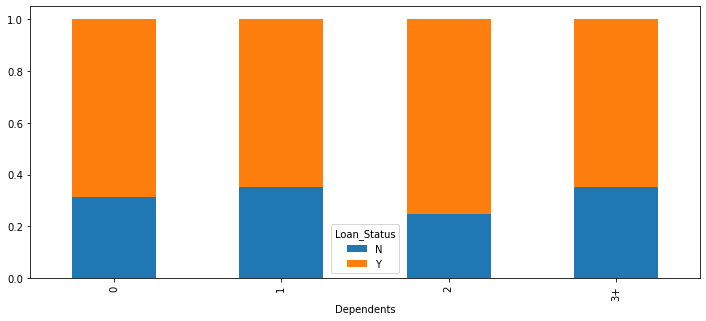

FOR  Property_Area


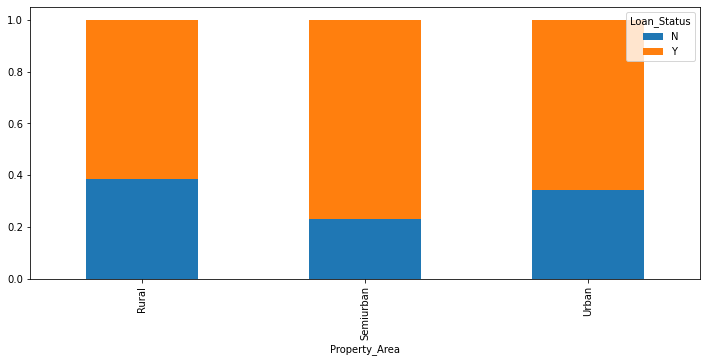

In [21]:
ord_columns = ["Dependents", "Property_Area"]

for x in ord_columns:
    print("FOR ", x)
    
    plot = pd.crosstab(train_data[x],train_data['Loan_Status'])
    plot.div(plot.sum(1).astype(float), axis=0).plot(kind = "bar", stacked = True, figsize = (12,5))
    plt.show()

1. **For Dependents :** We can conclde from above plot that for dependents 1 and 3+ have same for both type of tagets and for 2 dependents chances for loan approval is high among all other dependents. Order of loan approval for dependents be like this : 2 > 0 > 1 = 3+. So our hypithesis that if person have less number of dependents is wrong. 

2. **For Property_Area :** Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

### Bivariate Analysis on Numerical Feaures : ApplicantIncome, CoapplicantIncome, LoanAmount  

### Correlation matrix

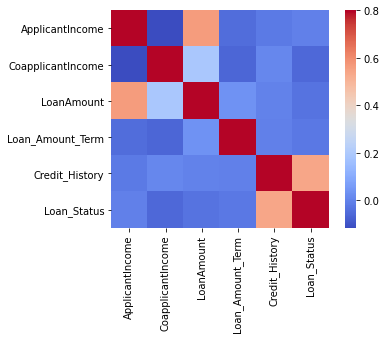

In [22]:
train_data['Loan_Status'].replace('N', 0,inplace = True)
train_data['Loan_Status'].replace('Y', 1,inplace = True)

corr = train_data.corr()
sns.heatmap(corr, vmax =.8, square = True, cmap = "coolwarm");
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

- We can observe that (LoanAmount and AplicantIncome), (LoanAmount and CoAplicantIncome) and (Loan_Status and Credit_History) is correlated.

For :  ApplicantIncome


<Figure size 1800x1080 with 0 Axes>

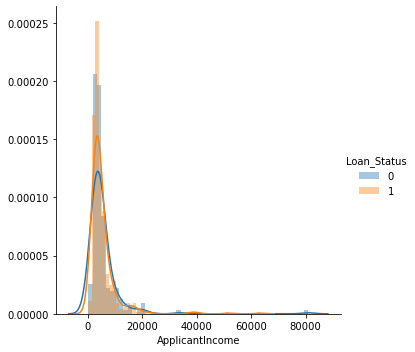

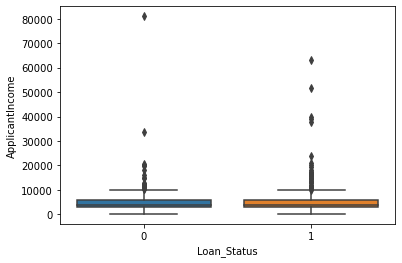

For :  CoapplicantIncome


<Figure size 1800x1080 with 0 Axes>

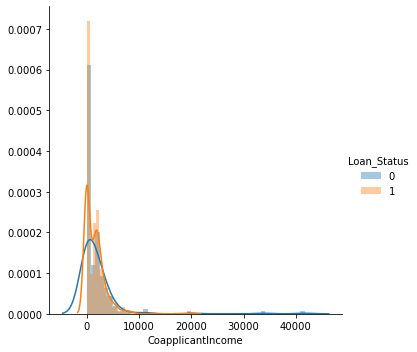

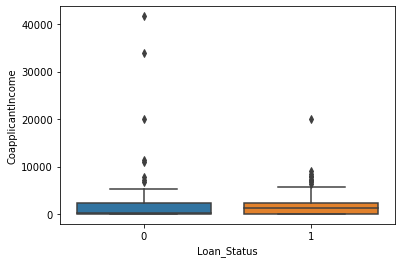

For :  LoanAmount


<Figure size 1800x1080 with 0 Axes>

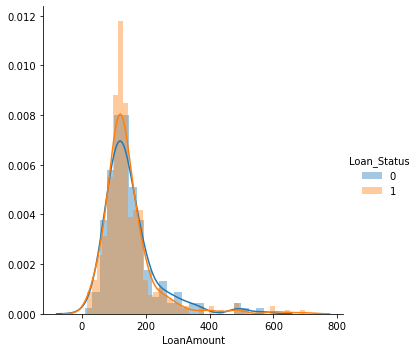

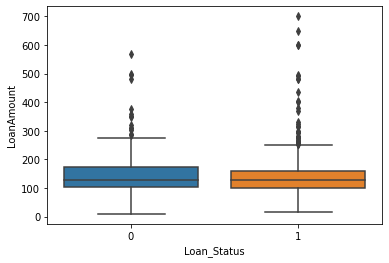

In [23]:
for x in numeric_columns:
    fig = plt.figure()
    fig.set_size_inches(25,15)
    
    print("For : ",x)
    sns.FacetGrid(train_data, hue = "Loan_Status", size = 5) \
       .map(sns.distplot, x) \
       .add_legend();
    plt.show(); 
   
    sns.boxplot(x = 'Loan_Status', y = x, data = train_data)
    plt.show()

## Above box plot cannot help much so we divide our numerical variables in chunks. 

### For ApplicantIncome

In [24]:
min(train_data.ApplicantIncome),max(train_data.ApplicantIncome)

(150, 81000)

Text(0, 0.5, 'Percentage')

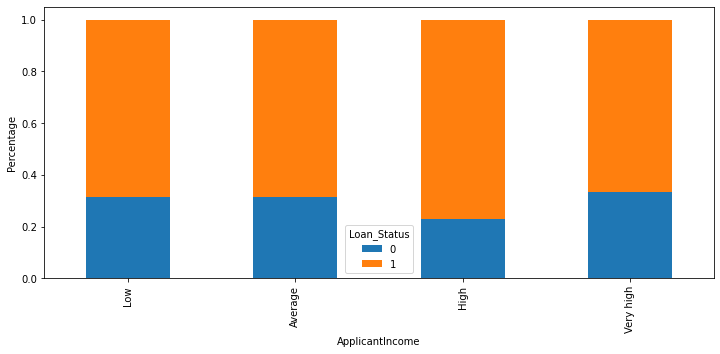

In [25]:
bins = [0,5000,15000,20000,81000]
group = ['Low','Average','High', 'Very high']
train_data['Income_bin'] = pd.cut(train_data['ApplicantIncome'], bins, labels = group)
Income_bin = pd.crosstab(train_data['Income_bin'], train_data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (12,5))
plt.xlabel('ApplicantIncome') 
plt.ylabel('Percentage')

**Observations:**
1. From above plot we can conclude our hypothesis for ApplicantIncome is not true. As we can see there are more number of peoples wih income in range of 20000 whose loans approved is more as compare to higher income.

### For CoApplicantIncome

* Many CoapplicantIncome is given to be zero so we cannot conclude from only CoapplicantIncome therefore we make a new feature called total income = CoapplicantIncome + ApplicantIncome

In [26]:
min(train_data.CoapplicantIncome),max(train_data.CoapplicantIncome)

(0.0, 41667.0)

Text(0, 0.5, 'Percentage')

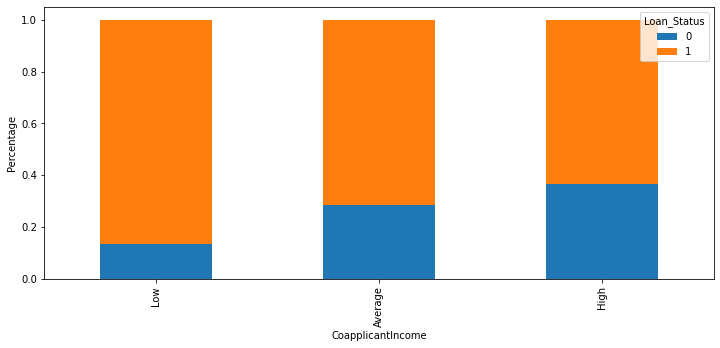

In [27]:
bins = [0,1000,5000,41667]
group = ['Low','Average','High']
train_data['Coapplicant_Income_bin'] = pd.cut(train_data['CoapplicantIncome'], bins, labels = group)
Coapplicant_Income_bin = pd.crosstab(train_data['Coapplicant_Income_bin'],train_data['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (12,5))
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

**Observations:**
* Because many coapplicants have zero value so above plot showing chances for loan approval is high for 0 coapplicant income.

### Adding New Feature (Total_Income) So For Total_Income

Text(0, 0.5, 'Percentage')

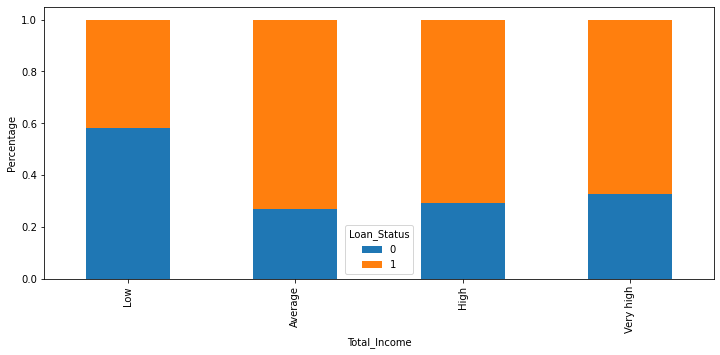

In [28]:
train_data['Total_Income'] = train_data['ApplicantIncome'] + train_data['CoapplicantIncome']
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
train_data['Total_Income_bin'] = pd.cut(train_data['Total_Income'],bins,labels=group)
Total_Income_bin = pd.crosstab(train_data['Total_Income_bin'], train_data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (12,5))
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

**Observations:**
* Now we can conclude that people who have less income have low chances of loan approval as compare of higher income people

### For Loan_Amount

In [29]:
min(train_data.LoanAmount),max(train_data.LoanAmount)

(9.0, 700.0)

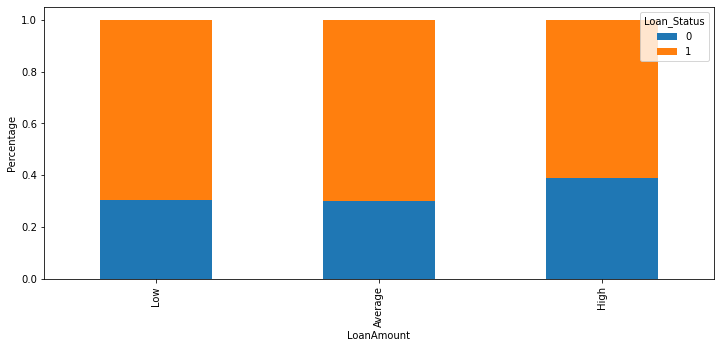

In [30]:
bins = [0,100,200,700] 
group = ['Low','Average','High']
train_data['LoanAmount_bin'] = pd.cut(train_data['LoanAmount'], bins, labels = group)
LoanAmount_bin = pd.crosstab(train_data['LoanAmount_bin'],train_data['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind = "bar", stacked = True, figsize = (12,5))
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')
plt.show()

**Observation:**
- Our hypthesis for loan amount is true ie, people who take low amount loan have higher chances of approval

### For Loan_Amount_Term

In [31]:
min(train_data.Loan_Amount_Term),max(train_data.Loan_Amount_Term)

(12.0, 480.0)

Text(0, 0.5, 'Percentage')

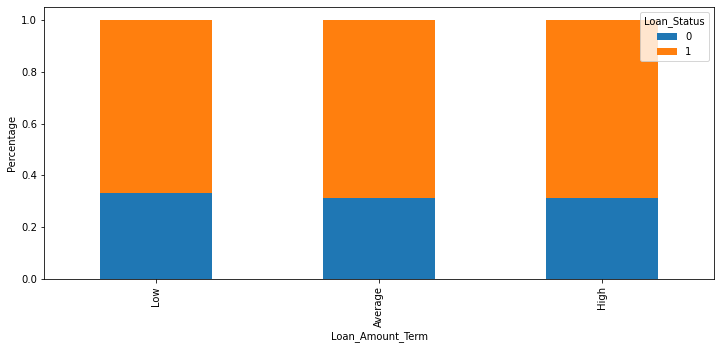

In [32]:
bins = [0,100,250,480] 
group = ['Low','Average','High']
train_data['Loan_Amount_Term_bin'] = pd.cut(train_data['Loan_Amount_Term'], bins, labels = group)
Loan_Amount_Term_bin = pd.crosstab(train_data['Loan_Amount_Term_bin'], train_data['Loan_Status'])
Loan_Amount_Term_bin.div(Loan_Amount_Term_bin.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (12,5))
plt.xlabel('Loan_Amount_Term')
plt.ylabel('Percentage')

**Observations:**
- Our hypothesis that if time for loan taken is less than their is high chances that loan to be repayed is not true at all

# Feature Engineering

### Now we can create some new features

1. **Total_income** = ApplicantIncome + CoapplicantIncome : From above plots we can see if Total_income is high then chances of loan approval is high.


2. **EMI in thousands** = LoanAmount / Loan_Amount_Term : If EMI is high then their is less chances that EMI be payed.


3. **Income left** = Total_income - EMI : It is income left after payment of EMI. If this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval. Generally banks have interest rates for housing oans in between 7.5 - 9 % pa so for calculation of EMI we are going to take 8 % pa.

* EMI = [P x R x (1+R)^N]/[(1+R)^N-1], where P stands for the loan amount or principal, R is the interest rate per month [if the interest rate per annum is 11%, then the rate of interest will be 11/(12 x 100)], and N is the number of monthly instalments.

In [33]:
def emi(p, r, t):
    
    # for one month interest
    r = r/(12*100)
    
    # for month period
    t = t
    
    emi = (p*r*pow(1+r,t))/(pow(1+r,t)-1) 
    return emi 

In [34]:
train_data['Total_Income'] = train_data['ApplicantIncome'] + train_data['CoapplicantIncome']
test_data['Total_Income'] = test_data['ApplicantIncome'] + test_data['CoapplicantIncome']

train_data['EMI'] = emi(train_data['LoanAmount'], 8, train_data['Loan_Amount_Term'])
test_data['EMI'] = emi(test_data['LoanAmount'], 8, test_data['Loan_Amount_Term'])

train_data['Income_left'] = train_data['Total_Income'] - (train_data['EMI']*12) 
test_data['Income_left'] = test_data['Total_Income'] - (test_data['EMI']*12)

In [35]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin,Loan_Amount_Term_bin,EMI,Income_left
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,...,Urban,1,Average,NaN,5849.0,High,Average,High,0.939219,5837.729376
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,...,Rural,0,Low,Average,6091.0,Very high,Average,High,0.939219,6079.729376
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,...,Urban,1,Low,NaN,3000.0,Average,Low,High,0.484285,2994.188585
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,...,Urban,1,Low,Average,4941.0,High,Average,High,0.880517,4930.433790
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,...,Urban,1,Average,NaN,6000.0,High,Average,High,1.034608,5987.584703


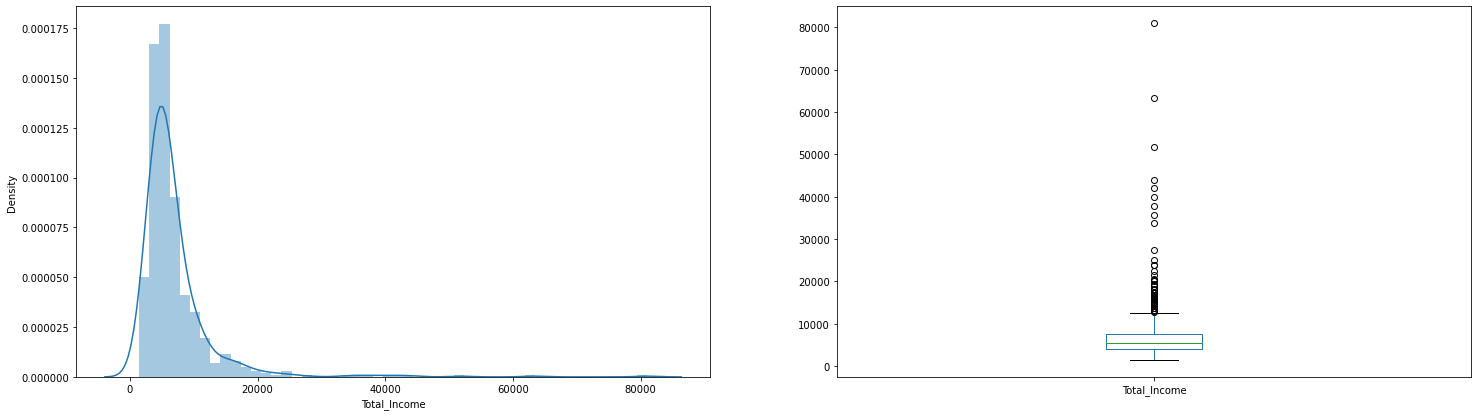

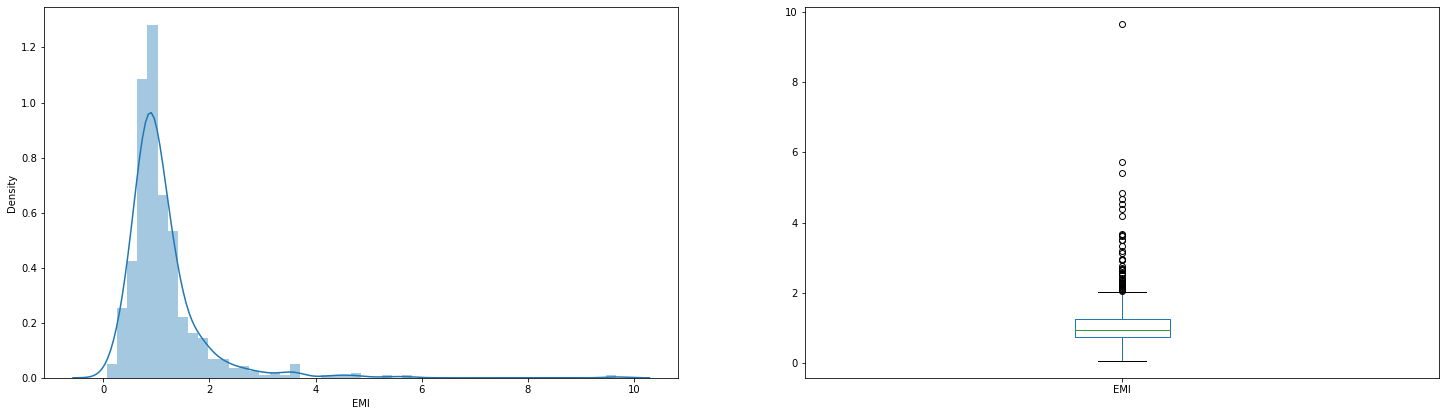

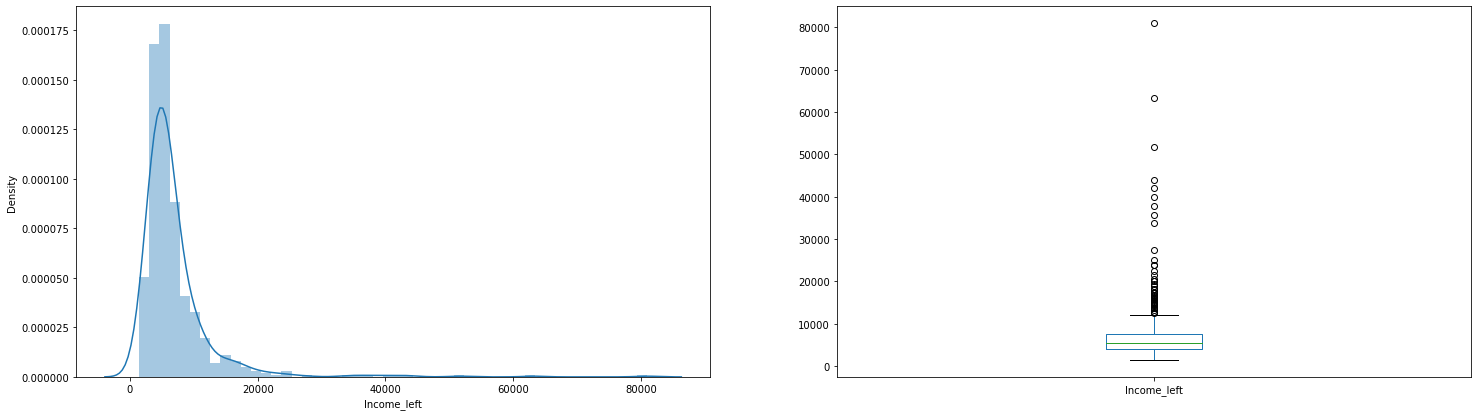

In [36]:
new_feature = ["Total_Income", "EMI" ,"Income_left"]

for x in new_feature:
    f = plt.figure()
    f.set_size_inches(25,15)
    plt.subplot(2,2,1)
    sns.distplot(train_data[x])
    plt.subplot(2,2,2)
    train_data[x].plot.box()
    plt.show()

From above we can see all of our engineered features are not normal distribution as well as have some outliers

### For EMI

In [37]:
min(train_data.EMI),max(train_data.EMI)

(0.06603881164914402, 9.655715628481843)

Text(0, 0.5, 'Percentage')

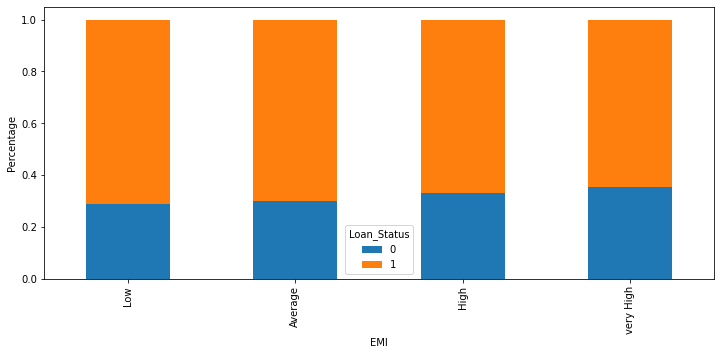

In [38]:
bins = [0,0.5,1,3,10] 
group = ['Low','Average','High','very High']
train_data['EMI_bin'] = pd.cut(train_data['EMI'], bins, labels = group)
EMI_bin = pd.crosstab(train_data['EMI_bin'],train_data['Loan_Status'])
EMI_bin.div(EMI_bin.sum(1).astype(float), axis = 0).plot(kind = "bar", stacked = True, figsize = (12,5))
plt.xlabel('EMI')
plt.ylabel('Percentage')

**Observations:**
- We Can see that the Appicants who have low EMI have more loan approvals

### Log transform for the Features containing Outiers : LoanAmount, ApplicantIncome, ... Total_Income, EMI

In [39]:
train_data['LoanAmount_log'] = np.log(train_data['LoanAmount'])
test_data['LoanAmount_log'] = np.log(test_data['LoanAmount'])

train_data['ApplicantIncome_log'] = np.log(train_data['ApplicantIncome'])
test_data['ApplicantIncome_log'] = np.log(test_data['ApplicantIncome'])

train_data['Total_Income_log'] = np.log(train_data['Total_Income'])
test_data['Total_Income_log'] = np.log(test_data['Total_Income'])

train_data['EMI_log'] = np.log(train_data['EMI'])
test_data['EMI_log'] = np.log(test_data['EMI'])

train_data["CoapplicantIncome_log"] = [np.log(i) if i != 0 else 0 for i in train_data["CoapplicantIncome"]]
test_data["CoapplicantIncome_log"] = [np.log(i) if i != 0 else 0 for i in test_data["CoapplicantIncome"]]

train_data["Income_Left_log"] = [np.log(i) if i != 0 else 0 for i in train_data["Income_left"]]
test_data["Income_Left_log"] = [np.log(i) if i != 0 else 0 for i in test_data["Income_left"]]

For :  LoanAmount_log


<Figure size 1800x1080 with 0 Axes>

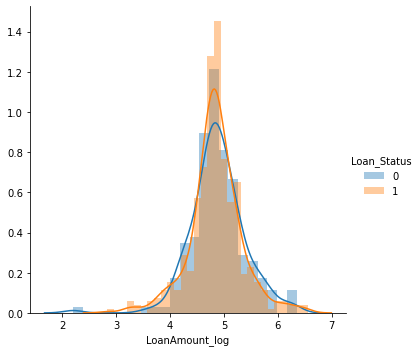

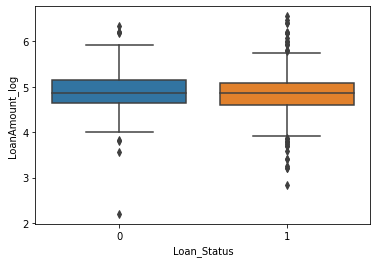

For :  ApplicantIncome_log


<Figure size 1800x1080 with 0 Axes>

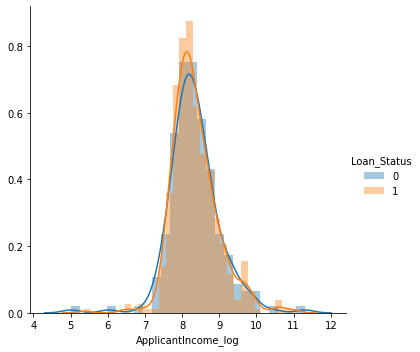

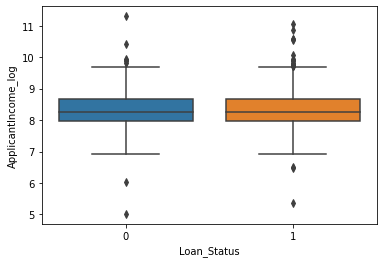

For :  Total_Income_log


<Figure size 1800x1080 with 0 Axes>

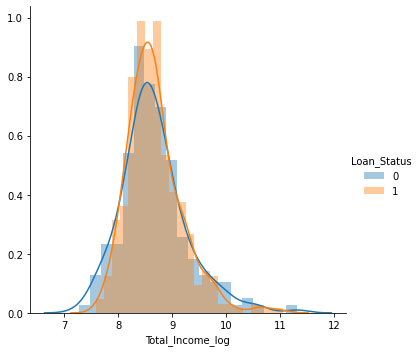

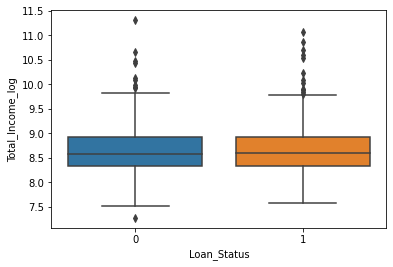

For :  EMI_log


<Figure size 1800x1080 with 0 Axes>

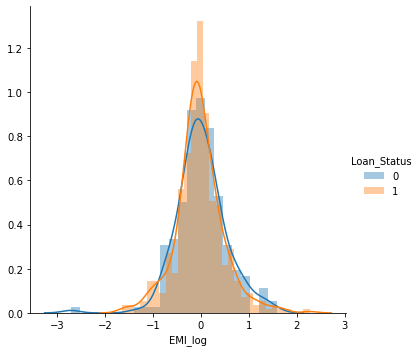

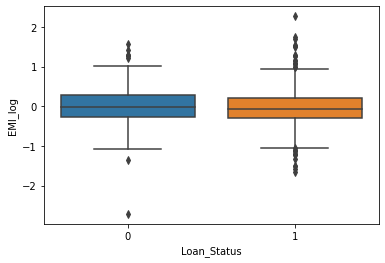

For :  CoapplicantIncome_log


<Figure size 1800x1080 with 0 Axes>

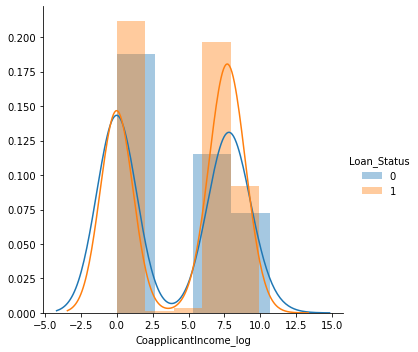

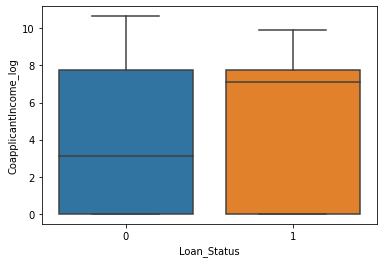

For :  Income_Left_log


<Figure size 1800x1080 with 0 Axes>

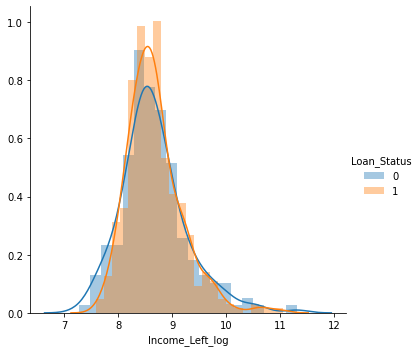

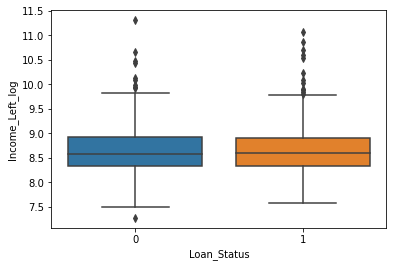

In [40]:
log_numeric = ["LoanAmount_log","ApplicantIncome_log","Total_Income_log","EMI_log", "CoapplicantIncome_log", 
              "Income_Left_log"]

for x in log_numeric:
    f = plt.figure()
    f.set_size_inches(25,15)
    print("For : ", x)
    sns.FacetGrid(train_data, hue = "Loan_Status", size = 5) \
       .map(sns.distplot, x) \
       .add_legend();
    plt.show(); 
   
    sns.boxplot(x='Loan_Status',y = x, data = train_data)
    plt.show()

* Now features are nearly normaly distributed after log transformation of features

In [41]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Loan_Amount_Term_bin,EMI,Income_left,EMI_bin,LoanAmount_log,ApplicantIncome_log,Total_Income_log,EMI_log,CoapplicantIncome_log,Income_Left_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,...,High,0.939219,5837.729376,Average,4.852030,8.674026,8.674026,-0.062707,0.000000,8.672097
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,...,High,0.939219,6079.729376,Average,4.852030,8.430109,8.714568,-0.062707,7.318540,8.712715
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,...,High,0.484285,2994.188585,Low,4.189655,8.006368,8.006368,-0.725082,0.000000,8.004429
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,...,High,0.880517,4930.433790,Average,4.787492,7.856707,8.505323,-0.127245,7.765569,8.503182
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,...,High,1.034608,5987.584703,High,4.948760,8.699515,8.699515,0.034023,0.000000,8.697443


### Drop Some Unwanted Features

In [42]:
train_data = train_data.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income', 'EMI_bin', 'Loan_ID','Loan_Amount_Term_bin'], axis = 1)
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,EMI,Income_left,LoanAmount_log,ApplicantIncome_log,Total_Income_log,EMI_log,CoapplicantIncome_log,Income_Left_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,0.939219,5837.729376,4.852030,8.674026,8.674026,-0.062707,0.000000,8.672097
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,0.939219,6079.729376,4.852030,8.430109,8.714568,-0.062707,7.318540,8.712715
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,0.484285,2994.188585,4.189655,8.006368,8.006368,-0.725082,0.000000,8.004429
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,0.880517,4930.433790,4.787492,7.856707,8.505323,-0.127245,7.765569,8.503182
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,1.034608,5987.584703,4.948760,8.699515,8.699515,0.034023,0.000000,8.697443


### From above hypothesis :

* Education , ApplicantIncome , LoanAmount, Credit_History , EMI and Total income which is ApplicantIncome  + CoapplicantIncome  gives proof of hypothesis related to CoapplicantIncome & ApplicantIncome

### Final Correlation Matrix

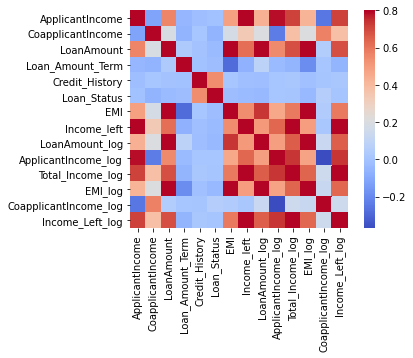

In [43]:
train_data['Loan_Status'].replace('N', 0,inplace = True)
train_data['Loan_Status'].replace('Y', 1,inplace = True)

corr = train_data.corr()
sns.heatmap(corr, vmax =.8, square = True, cmap = "coolwarm");
# 'RdBu_r' & 'BrBG' are other good diverging colormaps


### Encoding the Categorical Variables

In [44]:
# As we have seen above Lots of Categorical Variables need to change into Categorical
# Now perform Label Encoding for Categorical Variables

le = LabelEncoder()

train_data["Gender"] = le.fit_transform(train_data["Gender"])
train_data["Married"] = le.fit_transform(train_data["Married"])
train_data["Education"] = le.fit_transform(train_data["Education"])
train_data["Self_Employed"] = le.fit_transform(train_data["Self_Employed"])
train_data["Property_Area"] = le.fit_transform(train_data["Property_Area"])
train_data["Loan_Status"] = le.fit_transform(train_data["Loan_Status"])
train_data["Dependents"] = le.fit_transform(train_data["Dependents"])

### Having a Look on data Balanced or not

In [45]:
Yes = sum(train_data.Loan_Status == 1)
No  = sum(train_data.Loan_Status == 0)
print('Count of Approved Loans : ', Yes)
print('Count of Rejected Loans: ', No)

Count of Approved Loans :  422
Count of Rejected Loans:  192


**Observations:**
1. It seems that dataset contains more records with Approved Loan_Status than Rejected Loan_Status. Hence data is highly Imbalanced.
2. If data would have maximum of 20-30 records difference that time this imabalnced would be ignorable. But now due to this impalanceness we might lead to make wrong assumptions by model and also model will be biased after training. 
3. We will overcome this issue by balancing the data. To overcome this problem we will balance the data using Resampling techniques like Upsampling and Downsampling.

### Upsampling and Downsampling

In [46]:
# To keep original data as it is to use the same for later.
new_train_data = train_data.copy()

# Getting seperated data with 1 and 0 status.
df_majority = new_train_data[new_train_data.Loan_Status == 1]
df_minority = new_train_data[new_train_data.Loan_Status == 0]

# Here we are downsampling the Majority Class Data Points. 
# i.e. We will get equal amount of datapoint as Minority class from Majority class

df_manjority_downsampled = resample(df_majority, replace = False, n_samples = 192, random_state = 123)
df_downsampled = pd.concat([df_manjority_downsampled, df_minority])
print("Downsampled data:- \n", df_downsampled.Loan_Status.value_counts())

# Here we are upsampling the Minority Class Data Points. 
# i.e. We will get equal amount of datapoint as Majority class from Minority class
df_minority_upsampled = resample(df_minority, replace = True, n_samples = 422, random_state = 123)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
print("Upsampled data:- \n", df_upsampled.Loan_Status.value_counts())

Downsampled data:- 
 1    192
0    192
Name: Loan_Status, dtype: int64
Upsampled data:- 
 1    422
0    422
Name: Loan_Status, dtype: int64


In [47]:
df_upsampled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,EMI,Income_left,LoanAmount_log,ApplicantIncome_log,Total_Income_log,EMI_log,CoapplicantIncome_log,Income_Left_log
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,0.939219,5837.729376,4.852030,8.674026,8.674026,-0.062707,0.000000,8.672097
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,0.484285,2994.188585,4.189655,8.006368,8.006368,-0.725082,0.000000,8.004429
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,0.880517,4930.433790,4.787492,7.856707,8.505323,-0.127245,7.765569,8.503182
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,1.034608,5987.584703,4.948760,8.699515,8.699515,0.034023,0.000000,8.697443
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1,1.959151,9589.490183,5.587249,8.597297,9.170872,0.672511,8.341887,9.168423


In [48]:
df_downsampled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,EMI,Income_left,LoanAmount_log,ApplicantIncome_log,Total_Income_log,EMI_log,CoapplicantIncome_log,Income_Left_log
15,1,0,0,0,0,4950,0.0,125.0,360.0,1.0,2,1,0.917206,4938.993531,4.828314,8.507143,8.507143,-0.086423,0.000000,8.504917
41,1,0,0,0,0,1800,1213.0,47.0,360.0,1.0,2,1,0.344869,3008.861568,3.850148,7.495542,8.010692,-1.064590,7.100852,8.009317
58,1,1,1,0,0,8080,2250.0,180.0,360.0,1.0,2,1,1.320776,10314.150685,5.192957,8.997147,9.242808,0.278220,7.718685,9.241272
526,1,1,0,0,0,3775,0.0,110.0,360.0,1.0,1,1,0.807141,3765.314308,4.700480,8.236156,8.236156,-0.214257,0.000000,8.233587
25,1,1,0,0,1,9560,0.0,191.0,360.0,1.0,1,1,1.401490,9543.182116,5.252273,9.165343,9.165343,0.337536,0.000000,9.163582


# Modeling

- We will pass data on by one with different state i.e.
    - Only Scaled data
    - Scaled + Down Sampled Data
    - Scaled + Up Sampled Data

# Experiment 1: With Only Scaled Data

In [49]:
# Dropping Some Unwanted Variables and Storing data into new Variables

y = new_train_data['Loan_Status']
x = new_train_data.drop(["Loan_Status"], axis = 1)

# Splitting The Data into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# Data Standardization
# As our data is not much normally distributed we will choose Standardization using Standard-Scaler aiming that
# it will reduce more skewness and contribute in accuracy gain.

sc = StandardScaler()
x_train  = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

In [50]:
# Model - 1 ----- KNN
grid_parameters = {'n_neighbors' : [3,5,7,9,11,13,15,17]}
model_1_knn = GridSearchCV(KNeighborsClassifier(), grid_parameters, verbose = 1, cv = 3, n_jobs = -1)
model_1_knn.fit(x_train, y_train)
y_pred = model_1_knn.predict(x_test)

print ("Best Parameters : ",model_1_knn.best_params_)
print("KNeighborsClassifier: ", accuracy_score(y_pred,y_test))

print(classification_report(y_pred, y_test))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best Parameters :  {'n_neighbors': 9}
KNeighborsClassifier:  0.8048780487804879
              precision    recall  f1-score   support

           0       0.41      0.94      0.57        17
           1       0.99      0.78      0.87       106

    accuracy                           0.80       123
   macro avg       0.70      0.86      0.72       123
weighted avg       0.91      0.80      0.83       123



[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    4.7s finished


In [51]:
# Model - 2 ----- Gaussian NB
grid_parameters = {}
model_2_nb = GridSearchCV(GaussianNB(), grid_parameters, verbose = 1, cv = 3, n_jobs = -1)
model_2_nb.fit(x_train, y_train)
y_pred = model_2_nb.predict(x_test)

print ("Best Parameters : ",model_2_nb.best_params_)
print("Gaussian NB: ", accuracy_score(y_pred,y_test))

print(classification_report(y_pred, y_test))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters :  {}
Gaussian NB:  0.8048780487804879
              precision    recall  f1-score   support

           0       0.49      0.83      0.61        23
           1       0.95      0.80      0.87       100

    accuracy                           0.80       123
   macro avg       0.72      0.81      0.74       123
weighted avg       0.87      0.80      0.82       123



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [52]:
# Model - 3 ----- Logistic Regression
grid_parameters = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
model_3_lr = GridSearchCV(LogisticRegression(fit_intercept = True,), grid_parameters, verbose = 1, cv = 3, n_jobs = -1)
model_3_lr.fit(x_train, y_train)
y_pred = model_3_lr.predict(x_test)

print ("Best Parameters : ",model_3_lr.best_params_)
print("Logistic Regression: ", accuracy_score(y_pred,y_test))

print(classification_report(y_pred, y_test))

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best Parameters :  {'C': 10, 'penalty': 'l2'}
Logistic Regression:  0.7967479674796748
              precision    recall  f1-score   support

           0       0.41      0.89      0.56        18
           1       0.98      0.78      0.87       105

    accuracy                           0.80       123
   macro avg       0.69      0.83      0.71       123
weighted avg       0.89      0.80      0.82       123



[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    0.3s finished


In [53]:
# Model - 4 ----- SVM
grid_parameters = {'C': [0.001,0.01,0.1,1,10,100,1000], 'gamma': [0.001, 0.01, 1, 10, 100]}
model_4_svm = GridSearchCV(SVC(probability = True, class_weight="balanced"), grid_parameters, verbose = 1, cv = 3, n_jobs = -1)
model_4_svm.fit(x_train, y_train)
y_pred = model_4_svm.predict(x_test)

print ("Best Parameters : ",model_4_svm.best_params_)
print("Linear SVM: ", accuracy_score(y_pred,y_test))

print(classification_report(y_pred, y_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 35 candidates, totalling 105 fits
Best Parameters :  {'C': 10, 'gamma': 0.01}
Linear SVM:  0.7967479674796748
              precision    recall  f1-score   support

           0       0.44      0.85      0.58        20
           1       0.96      0.79      0.87       103

    accuracy                           0.80       123
   macro avg       0.70      0.82      0.72       123
weighted avg       0.88      0.80      0.82       123



[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    1.8s finished


In [54]:
# Model - 5 ----- Random Forest
grid_parameters = {'max_depth' : [5, 7, 10], 'n_estimators' : [100,150,200,250,500]}
model_5_rf = GridSearchCV(RandomForestClassifier(), grid_parameters, verbose = 1, cv = 3, n_jobs = -1)
model_5_rf.fit(x_train, y_train)
y_pred = model_5_rf.predict(x_test)

print ("Best Parameters : ",model_5_rf.best_params_)
print("Random Forest: ", accuracy_score(y_pred,y_test))

print(classification_report(y_pred, y_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   11.3s finished


Best Parameters :  {'max_depth': 5, 'n_estimators': 150}
Random Forest:  0.7886178861788617
              precision    recall  f1-score   support

           0       0.41      0.84      0.55        19
           1       0.96      0.78      0.86       104

    accuracy                           0.79       123
   macro avg       0.69      0.81      0.71       123
weighted avg       0.88      0.79      0.81       123



In [55]:
# Model - 6 ----- XGBClassifier
grid_parameters = {'max_depth' : [3, 5, 7, 10], 'learning_rate' : [0.001, 0.01, 0.1, 1, 10], 
                   'n_estimators' : [100,150,200,250,500]}
model_6_xgb = GridSearchCV(XGBClassifier(), grid_parameters, verbose = 1, cv = 3, n_jobs = -1)
model_6_xgb.fit(x_train, y_train)
y_pred = model_6_xgb.predict(x_test)

print ("Best Parameters : ",model_6_xgb.best_params_)
print("Random Forest: ", accuracy_score(y_pred,y_test))

print(classification_report(y_pred, y_test))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 293 out of 300 | elapsed:   26.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   26.9s finished


Best Parameters :  {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200}
Random Forest:  0.8130081300813008
              precision    recall  f1-score   support

           0       0.49      0.86      0.62        22
           1       0.96      0.80      0.88       101

    accuracy                           0.81       123
   macro avg       0.73      0.83      0.75       123
weighted avg       0.88      0.81      0.83       123



# Experiment 2: with Sclaed + Down Sampled Data

In [56]:
# Dropping Some Unwanted Variables and Storing data into new Variables

y = df_downsampled['Loan_Status']
x = df_downsampled.drop(["Loan_Status"], axis = 1)

# Splitting The Data into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# Data Standardization
# As our data is not much normally distributed we will choose Standardization using Standard-Scaler aiming that
# it will reduce more skewness and contribute in accuracy gain.

sc = StandardScaler()
x_train  = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

In [57]:
# Model - 7 ----- KNN
grid_parameters = {'n_neighbors' : [3,5,7,9,11,13,15,17]}
model_7_knn = GridSearchCV(KNeighborsClassifier(), grid_parameters, verbose = 1, cv = 3, n_jobs = -1)
model_7_knn.fit(x_train, y_train)
y_pred = model_7_knn.predict(x_test)

print ("Best Parameters : ",model_7_knn.best_params_)
print("KNeighborsClassifier: ", accuracy_score(y_pred,y_test))

print(classification_report(y_pred, y_test))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters :  {'n_neighbors': 13}
KNeighborsClassifier:  0.6623376623376623
              precision    recall  f1-score   support

           0       0.47      0.75      0.58        24
           1       0.85      0.62      0.72        53

    accuracy                           0.66        77
   macro avg       0.66      0.69      0.65        77
weighted avg       0.73      0.66      0.67        77



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.0s finished


In [58]:
# Model - 8 ----- Gaussian NB
grid_parameters = {}
model_8_nb = GridSearchCV(GaussianNB(), grid_parameters, verbose = 1, cv = 3, n_jobs = -1)
model_8_nb.fit(x_train, y_train)
y_pred = model_8_nb.predict(x_test)

print ("Best Parameters : ",model_8_nb.best_params_)
print("Gaussian NB: ", accuracy_score(y_pred,y_test))

print(classification_report(y_pred, y_test))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters :  {}
Gaussian NB:  0.6753246753246753
              precision    recall  f1-score   support

           0       0.50      0.76      0.60        25
           1       0.85      0.63      0.73        52

    accuracy                           0.68        77
   macro avg       0.67      0.70      0.66        77
weighted avg       0.73      0.68      0.69        77



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [59]:
# Model - 9 ----- Logistic Regression
grid_parameters = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
model_9_lr = GridSearchCV(LogisticRegression(fit_intercept = True,), grid_parameters, verbose = 1, cv = 3, n_jobs = -1)
model_9_lr.fit(x_train, y_train)
y_pred = model_9_lr.predict(x_test)

print ("Best Parameters : ",model_9_lr.best_params_)
print("Logistic Regression: ", accuracy_score(y_pred,y_test))

print(classification_report(y_pred, y_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 14 candidates, totalling 42 fits
Best Parameters :  {'C': 0.1, 'penalty': 'l2'}
Logistic Regression:  0.6883116883116883
              precision    recall  f1-score   support

           0       0.55      0.75      0.64        28
           1       0.82      0.65      0.73        49

    accuracy                           0.69        77
   macro avg       0.69      0.70      0.68        77
weighted avg       0.72      0.69      0.69        77



[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    0.2s finished


In [60]:
# Model - 10 ----- SVM
grid_parameters = {'C': [0.001,0.01,0.1,1,10,100,1000], 'gamma': [0.001, 0.01, 1, 10, 100]}
model_10_svm = GridSearchCV(SVC(probability = True, class_weight="balanced"), grid_parameters, verbose = 1, cv = 3, n_jobs = -1)
model_10_svm.fit(x_train, y_train)
y_pred = model_10_svm.predict(x_test)

print ("Best Parameters : ",model_10_svm.best_params_)
print("Linear SVM: ", accuracy_score(y_pred,y_test))

print(classification_report(y_pred, y_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 35 candidates, totalling 105 fits
Best Parameters :  {'C': 10, 'gamma': 0.01}
Linear SVM:  0.6883116883116883
              precision    recall  f1-score   support

           0       0.45      0.85      0.59        20
           1       0.92      0.63      0.75        57

    accuracy                           0.69        77
   macro avg       0.69      0.74      0.67        77
weighted avg       0.80      0.69      0.71        77



[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    0.6s finished


In [61]:
# Model - 11 ----- Random Forest
grid_parameters = {'max_depth' : [5, 7, 10], 'n_estimators' : [100,150,200,250,500]}
model_11_rf = GridSearchCV(RandomForestClassifier(), grid_parameters, verbose = 1, cv = 3, n_jobs = -1)
model_11_rf.fit(x_train, y_train)
y_pred = model_11_rf.predict(x_test)

print ("Best Parameters : ",model_11_rf.best_params_)
print("Random Forest: ", accuracy_score(y_pred,y_test))

print(classification_report(y_pred, y_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    9.5s finished


Best Parameters :  {'max_depth': 5, 'n_estimators': 200}
Random Forest:  0.6753246753246753
              precision    recall  f1-score   support

           0       0.50      0.76      0.60        25
           1       0.85      0.63      0.73        52

    accuracy                           0.68        77
   macro avg       0.67      0.70      0.66        77
weighted avg       0.73      0.68      0.69        77



In [62]:
# Model - 12 ----- XGBClassifier
grid_parameters = {'max_depth' : [3, 5, 7, 10], 'learning_rate' : [0.001, 0.01, 0.1, 1, 10], 
                   'n_estimators' : [100,150,200,250,500]}
model_12_xgb = GridSearchCV(XGBClassifier(), grid_parameters, verbose = 1, cv = 3, n_jobs = -1)
model_12_xgb.fit(x_train, y_train)
y_pred = model_12_xgb.predict(x_test)

print ("Best Parameters : ",model_12_xgb.best_params_)
print("Random Forest: ", accuracy_score(y_pred,y_test))

print(classification_report(y_pred, y_test))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 293 out of 300 | elapsed:   25.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   25.1s finished


Best Parameters :  {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500}
Random Forest:  0.7012987012987013
              precision    recall  f1-score   support

           0       0.61      0.74      0.67        31
           1       0.79      0.67      0.73        46

    accuracy                           0.70        77
   macro avg       0.70      0.71      0.70        77
weighted avg       0.72      0.70      0.70        77



# Experiment 3: With Sclaed + Up Sampled Data

In [63]:
# Dropping Some Unwanted Variables and Storing data into new Variables

y = df_upsampled['Loan_Status']
x = df_upsampled.drop(["Loan_Status"], axis = 1)

# Splitting The Data into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# Data Standardization
# As our data is not much normally distributed we will choose Standardization using Standard-Scaler aiming that
# it will reduce more skewness and contribute in accuracy gain.

sc = StandardScaler()
x_train  = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

In [64]:
# Model - 13 ----- KNN
grid_parameters = {'n_neighbors' : [3,5,7,9,11,13,15,17]}
model_13_knn = GridSearchCV(KNeighborsClassifier(), grid_parameters, verbose = 1, cv = 3, n_jobs = -1)
model_13_knn.fit(x_train, y_train)
y_pred = model_13_knn.predict(x_test)

print ("Best Parameters : ",model_13_knn.best_params_)
print("KNeighborsClassifier: ", accuracy_score(y_pred,y_test))

print(classification_report(y_pred, y_test))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best Parameters :  {'n_neighbors': 3}
KNeighborsClassifier:  0.8106508875739645
              precision    recall  f1-score   support

           0       0.77      0.86      0.81        81
           1       0.86      0.76      0.81        88

    accuracy                           0.81       169
   macro avg       0.81      0.81      0.81       169
weighted avg       0.82      0.81      0.81       169



[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.2s finished


In [65]:
# Model - 14 ----- Gaussian NB
grid_parameters = {}
model_14_nb = GridSearchCV(GaussianNB(), grid_parameters, verbose = 1, cv = 3, n_jobs = -1)
model_14_nb.fit(x_train, y_train)
y_pred = model_14_nb.predict(x_test)

print ("Best Parameters : ",model_14_nb.best_params_)
print("Gaussian NB: ", accuracy_score(y_pred,y_test))

print(classification_report(y_pred, y_test))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters :  {}
Gaussian NB:  0.6627218934911243
              precision    recall  f1-score   support

           0       0.44      0.87      0.58        46
           1       0.92      0.59      0.72       123

    accuracy                           0.66       169
   macro avg       0.68      0.73      0.65       169
weighted avg       0.79      0.66      0.68       169



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [66]:
# Model - 15 ----- Logistic Regression
grid_parameters = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
model_15_lr = GridSearchCV(LogisticRegression(fit_intercept = True,), grid_parameters, verbose = 1, cv = 3, n_jobs = -1)
model_15_lr.fit(x_train, y_train)
y_pred = model_15_lr.predict(x_test)

print ("Best Parameters : ",model_15_lr.best_params_)
print("Logistic Regression: ", accuracy_score(y_pred,y_test))

print(classification_report(y_pred, y_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 14 candidates, totalling 42 fits
Best Parameters :  {'C': 0.001, 'penalty': 'l2'}
Logistic Regression:  0.6686390532544378
              precision    recall  f1-score   support

           0       0.44      0.89      0.59        45
           1       0.94      0.59      0.72       124

    accuracy                           0.67       169
   macro avg       0.69      0.74      0.66       169
weighted avg       0.80      0.67      0.69       169



[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    0.2s finished


In [67]:
# Model - 16 ----- SVM
grid_parameters = {'C': [0.001,0.01,0.1,1,10,100,1000], 'gamma': [0.001, 0.01, 1, 10, 100]}
model_16_svm = GridSearchCV(SVC(probability = True, class_weight="balanced"), grid_parameters, verbose = 1, cv = 3, n_jobs = -1)
model_16_svm.fit(x_train, y_train)
y_pred = model_16_svm.predict(x_test)

print ("Best Parameters : ",model_16_svm.best_params_)
print("Linear SVM: ", accuracy_score(y_pred,y_test))

print(classification_report(y_pred, y_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 35 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  98 out of 105 | elapsed:    3.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    3.5s finished


Best Parameters :  {'C': 1, 'gamma': 100}
Linear SVM:  0.893491124260355
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        73
           1       1.00      0.81      0.90        96

    accuracy                           0.89       169
   macro avg       0.90      0.91      0.89       169
weighted avg       0.91      0.89      0.89       169



In [68]:
# Model - 17 ----- Random Forest
grid_parameters = {'max_depth' : [5, 7, 10], 'n_estimators' : [100,150,200,250,500]}
model_17_rf = GridSearchCV(RandomForestClassifier(), grid_parameters, verbose = 1, cv = 3, n_jobs = -1)
model_17_rf.fit(x_train, y_train)
y_pred = model_17_rf.predict(x_test)

print ("Best Parameters : ",model_17_rf.best_params_)
print("Random Forest: ", accuracy_score(y_pred,y_test))

print(classification_report(y_pred, y_test))

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   12.2s finished


Best Parameters :  {'max_depth': 10, 'n_estimators': 200}
Random Forest:  0.863905325443787
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        80
           1       0.92      0.81      0.86        89

    accuracy                           0.86       169
   macro avg       0.87      0.87      0.86       169
weighted avg       0.87      0.86      0.86       169



In [69]:
# Model - 18 ----- XGBClassifier
grid_parameters = {'max_depth' : [3, 5, 7, 10], 'learning_rate' : [0.001, 0.01, 0.1, 1, 10], 
                   'n_estimators' : [100,150,200,250,500]}
model_18_xgb = GridSearchCV(XGBClassifier(objective = 'binary:hinge'), grid_parameters, verbose = 1, cv = 3, n_jobs = -1)
model_18_xgb.fit(x_train, y_train)
y_pred = model_18_xgb.predict(x_test)

print ("Best Parameters : ",model_18_xgb.best_params_)
print("XGB Classifier: ", accuracy_score(y_pred,y_test))

print(classification_report(y_pred, y_test))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   39.2s finished


Best Parameters :  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
XGB Classifier:  0.8875739644970414
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        98
           1       0.83      0.92      0.87        71

    accuracy                           0.89       169
   macro avg       0.88      0.89      0.89       169
weighted avg       0.89      0.89      0.89       169



# Model Comparisons

### Model Comparison With Only Scaled Data

In [70]:
print('Accuracy by Using hypertuned KNN                       : 80.48%')
print('Accuracy by Using hypertuned Gaussian NB               : 80.48%')
print('Accuracy by Using hypertuned Logistic Regression       : 79.67%')
print('Accuracy by Using hypertuned SVM                       : 79.67%')
print('Accuracy by Using hypertuned Random Forest             : 78.86%')
print('Accuracy by Using hypertuned XGB Classifier (Logistic) : 81.30%')

Accuracy by Using hypertuned KNN                       : 80.48%
Accuracy by Using hypertuned Gaussian NB               : 80.48%
Accuracy by Using hypertuned Logistic Regression       : 79.67%
Accuracy by Using hypertuned SVM                       : 79.67%
Accuracy by Using hypertuned Random Forest             : 78.86%
Accuracy by Using hypertuned XGB Classifier (Logistic) : 81.30%


### Model Comparison With Sclaed + Down Sampled Data

In [71]:
print('Accuracy by Using hypertuned KNN                       : 66.23%')
print('Accuracy by Using hypertuned Gaussian NB               : 67.53%')
print('Accuracy by Using hypertuned Logistic Regression       : 68.83%')
print('Accuracy by Using hypertuned SVM                       : 68.83%')
print('Accuracy by Using hypertuned Random Forest             : 66.23%')
print('Accuracy by Using hypertuned XGB Classifier (Logistic) : 70.12%')

Accuracy by Using hypertuned KNN                       : 66.23%
Accuracy by Using hypertuned Gaussian NB               : 67.53%
Accuracy by Using hypertuned Logistic Regression       : 68.83%
Accuracy by Using hypertuned SVM                       : 68.83%
Accuracy by Using hypertuned Random Forest             : 66.23%
Accuracy by Using hypertuned XGB Classifier (Logistic) : 70.12%


### Model Comparison With Sclaed + Up Sampled Data

In [72]:
print('Accuracy by Using hypertuned KNN                       : 81.06%')
print('Accuracy by Using hypertuned Gaussian NB               : 66.27%')
print('Accuracy by Using hypertuned Logistic Regression       : 66.86%')
print('Accuracy by Using hypertuned SVM                       : 89.34%')
print('Accuracy by Using hypertuned Random Forest             : 84.61%')
print('Accuracy by Using hypertuned XGB Classifier (Hinge)    : 88.75%')

Accuracy by Using hypertuned KNN                       : 81.06%
Accuracy by Using hypertuned Gaussian NB               : 66.27%
Accuracy by Using hypertuned Logistic Regression       : 66.86%
Accuracy by Using hypertuned SVM                       : 89.34%
Accuracy by Using hypertuned Random Forest             : 84.61%
Accuracy by Using hypertuned XGB Classifier (Hinge)    : 88.75%


# End Results

- After all the possible experiments Maximum accuracy of **89.34%** is achieved by using **SVM** and by making data balanced as **Up Sampling.**
- Surprisingly XGB Classifier does not give the accuracy better than SVM.